# Import Dependences & Raw Data Set Up

In [148]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import requests
import time
import json

In [225]:
# Alcohol Consumption raw data file to load
file_path = "Data/alcsales_August2020_codedfullfile.csv"

# Read file and store into data frame
alcohol_sales_data = pd.read_csv(file_path)

#Convert Date/Time format
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.to_csv(r'Data/alcsales_August2020_codedfullfile_2.csv', index = False)

In [226]:
# Show dataframe head
alcohol_sales_data.head(10)

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01
5,2017,1,12,1,2770686,1138752,17722275,0.0643,Florida,January,January 2017,1 2017,2017-01-01
6,2017,1,17,1,1044642,429348,10556100,0.0407,Illinois,January,January 2017,1 2017,2017-01-01
7,2017,1,20,1,389012,159884,2356231,0.0679,Kansas,January,January 2017,1 2017,2017-01-01
8,2017,1,21,1,779156,320233,3670568,0.0872,Kentucky,January,January 2017,1 2017,2017-01-01
9,2017,1,22,1,633111,260209,3807282,0.0683,Louisiana,January,January 2017,1 2017,2017-01-01


# Aggregate Data From All States Over Time

In [227]:
# Group all states data by month/year/date format
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_total_pop = month_date_alcohol_sales_groupby["Population"].sum()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

#Create Data Frame
total_alcohol_gallons_over_time_by_date = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_total_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Show head of Data Frame
total_alcohol_gallons_over_time_by_date.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,303767158,0.057390
2017-02-01,202554024,17181353,303767158,0.056627
2017-03-01,234341479,19741824,303767158,0.066356
2017-04-01,242022452,19623984,303767158,0.065969
2017-05-01,253716538,20843786,303767158,0.071760


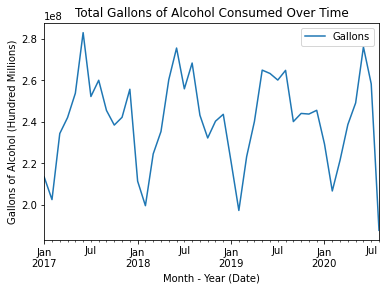

In [18]:
#Plot gallons of alcohol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Gallons', title="Total Gallons of Alcohol Consumed Over Time")
plt.ylabel('Gallons of Alcohol (Hundred Millions)')

#Save figure to folder
plt.savefig("allstates_alcohol_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

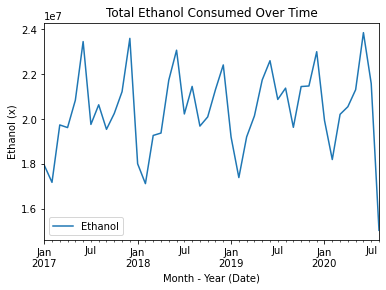

In [20]:
#Plot total ethanol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Ethanol', title="Total Ethanol Consumed Over Time")
plt.ylabel('Ethanol (x)')

#Save figure to folder
plt.savefig("allstates_ethanol_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

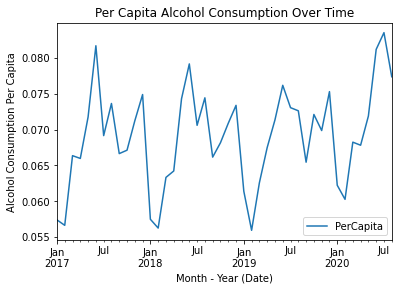

In [21]:
#Plot avg. per capita over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='PerCapita', title="Per Capita Alcohol Consumption Over Time")
plt.ylabel('Alcohol Consumption Per Capita')

#Save figure to folder
plt.savefig("allstates_percapita_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

# Run TTest Across Years

## <span style="color:red"> TTEST FOR ALL MONTHS NOT GIVING GREAT RESULT</span>

In [123]:
# Calculate the gallons mean for all states for year 2020
year_2020 = alcohol_sales_data[alcohol_sales_data["Year"] == 2020]
year_2020.PerCapita.mean()

0.07111653944020364

In [151]:
# Calculate the gallons mean for all states for year 2019
year_2019_2018_2017 = alcohol_sales_data[(alcohol_sales_data["Year"] != 2020)]
year_2019_2018_2017.PerCapita.mean()

0.06844738247863243

In [126]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(year_2020.PerCapita, year_2019_2018_2017.PerCapita, equal_var=False)

Ttest_indResult(statistic=1.4174576422248202, pvalue=0.15692431237522786)

## <span style="color:red"> RERUNNING TTEST FOR ONLY MONTHS 1 - 7 </span>

In [114]:
#Clean data for limited number of months available for all years
cleaned_alcohol_data_copy = alcohol_sales_data.loc[(alcohol_sales_data["Month"] ==1) | (alcohol_sales_data["Month"] == 2) | (alcohol_sales_data["Month"] == 3)
                                      | (alcohol_sales_data["Month"] == 4) | (alcohol_sales_data["Month"] == 5) |
                                               (alcohol_sales_data["Month"] == 5) | (alcohol_sales_data["Month"] == 6)
                                               | (alcohol_sales_data["Month"] ==7)].copy()

In [127]:
# Calculate the gallons mean for all states for year 2020 v2
year_2020_v2 = cleaned_alcohol_data_copy[cleaned_alcohol_data_copy["Year"] == 2020]
year_2020_v2.PerCapita.mean()

0.07048571428571437

In [128]:
# Calculate the gallons mean for all states for year 2019 v2
year_2019_2018_2017_v2 = cleaned_alcohol_data_copy[(cleaned_alcohol_data_copy["Year"] == 2019) | (cleaned_alcohol_data_copy["Year"] == 2018) | (cleaned_alcohol_data_copy["Year"] == 2017)]
year_2019_2018_2017_v2.PerCapita.mean()

0.06677353479853486

In [129]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(year_2020_v2.PerCapita, year_2019_2018_2017_v2.PerCapita, equal_var=False)

Ttest_indResult(statistic=1.8113690688236297, pvalue=0.07061109506673731)

In [177]:
month = 2
state = 'Connecticut'

months = range(1,8)
states = alcohol_sales_data["State"].unique()

results = []

for month in months:
    for state in states:
        subset = alcohol_sales_data[(alcohol_sales_data["Month"] == month) & (alcohol_sales_data["State"] == state)]
        sample2020 = subset.loc[subset["Year"] == 2020]
        sample_baseline = subset.loc[subset["Year"] != 2020]
        
        # Calculate Independent (Two Sample) t-test
        test = stats.ttest_ind(sample2020.Gallons, sample_baseline.Gallons, equal_var=False)
        
        results.append({
            "State": state, "Month": month, "t_test_statistic": test.statistic, "pvalue": test.pvalue
        })
        
        

ttest_df = pd.DataFrame(results)
ttest_df.sort_values('pvalue')

,State,Month,t_test_statistic,pvalue
72,Utah,4,12.028184,0.000031
28,Louisiana,2,5.983048,0.001024
53,Utah,3,3.159104,0.044088
9,Louisiana,1,2.905385,0.046515
15,Utah,1,2.612168,0.052428
...,...,...,...,...
21,Colorado,2,0.003148,0.997681
46,Kentucky,3,0.001324,0.999023
123,Louisiana,7,NaN,NaN
129,Utah,7,NaN,NaN


# State by State Breakdown of Data

In [27]:
# Set groupby by State
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

# Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()

# Find total gallons of ethanol per state
total_gallons_per_state = state_alcohol_sales_groupby["Gallons"].sum()

# Find total ethanol per state
total_ethanol_per_state = state_alcohol_sales_groupby["Ethanol"].sum()

#Find average population per state
total_population_per_state = state_alcohol_sales_groupby["Population"].median()

#Find per capita alcohol consumption per state
per_capita_per_state = state_alcohol_sales_groupby["PerCapita"].mean()

#Add state by state breakdown to dataframe
grouped_state_df = pd.DataFrame({
    "Count": count_per_state,
    "Gallons": total_ethanol_per_state,
    "Ethanol": total_ethanol_per_state,
    "Total Population": total_population_per_state,
    "Avg PerCapita": per_capita_per_state
})


#Save to CSV
grouped_state_df.to_csv(r'grouped_state_df.csv', index = True)

In [28]:
#Show dataframe
grouped_state_df.head()

,Count,Gallons,Ethanol,Total Population,Avg PerCapita
State,,,,,
Alaska,132,6165264,6165264,590760,0.079049
Arkansas,132,16429378,16429378,2465297,0.050443
Colorado,132,49557495,49557495,4715895,0.079425
Connecticut,129,26302609,26302609,3019150,0.067557
Delaware,129,10447503,10447503,808146,0.100049


# Individual State Analyses

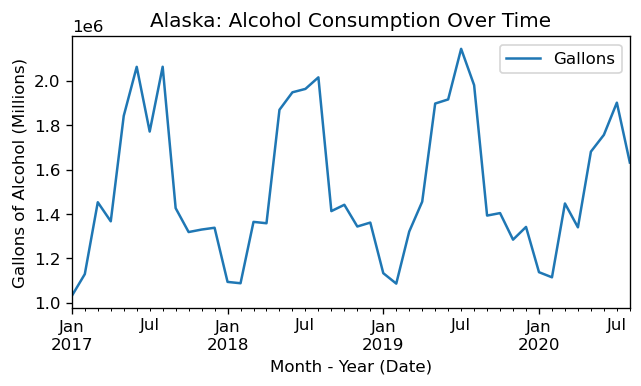

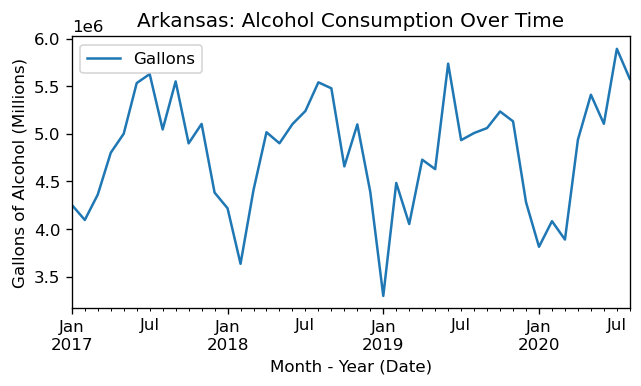

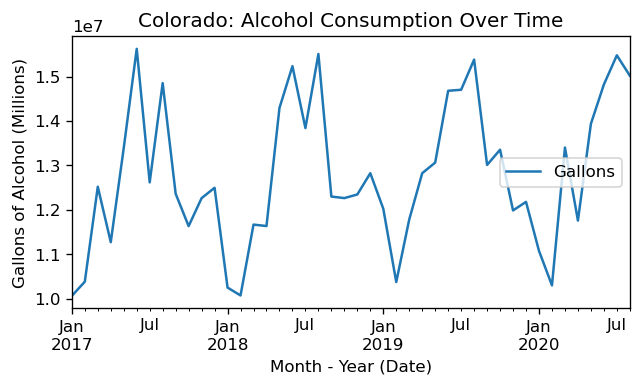

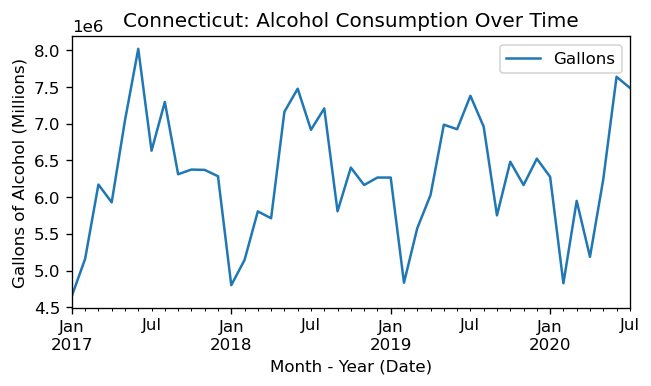

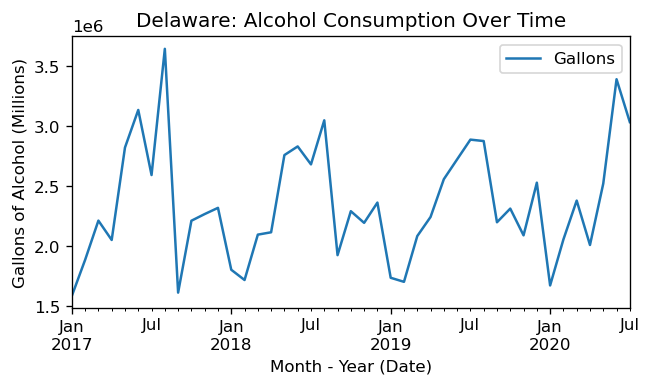

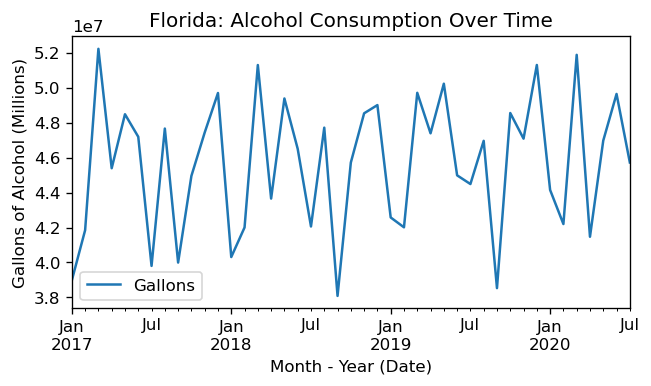

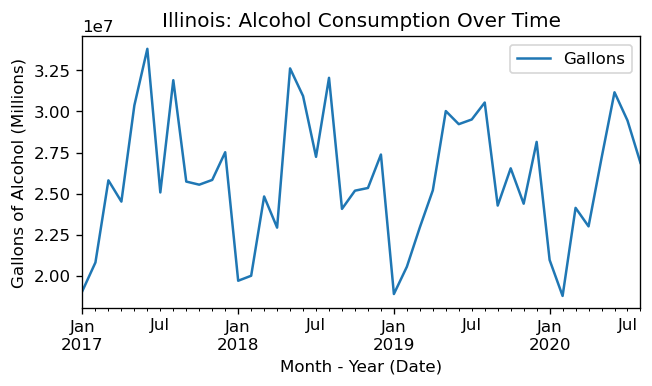

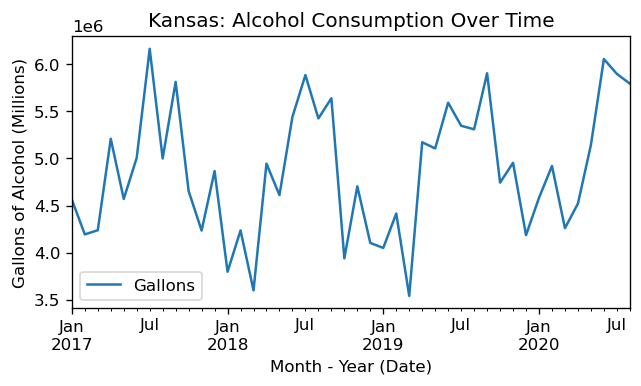

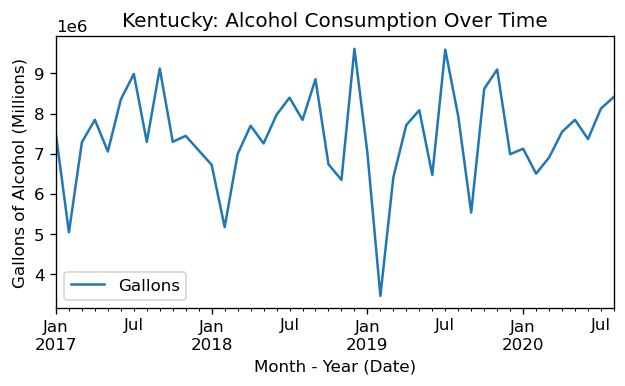

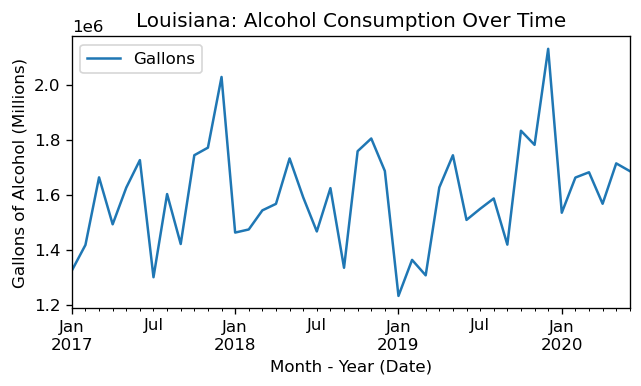

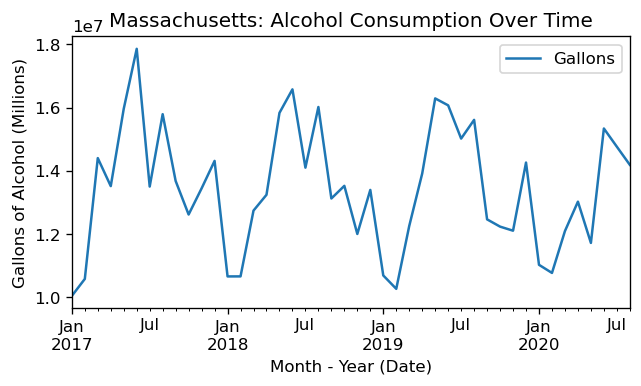

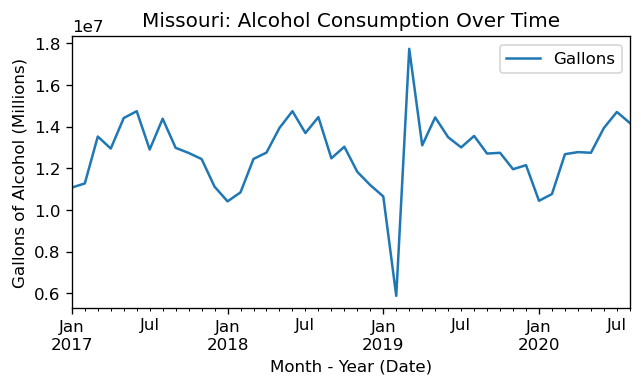

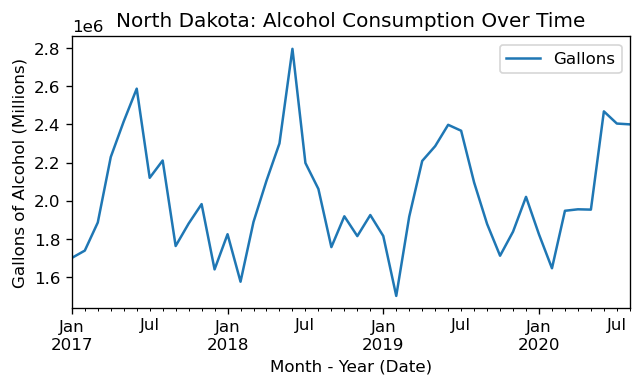

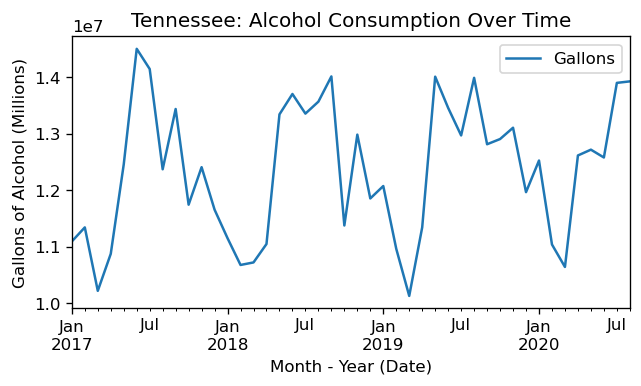

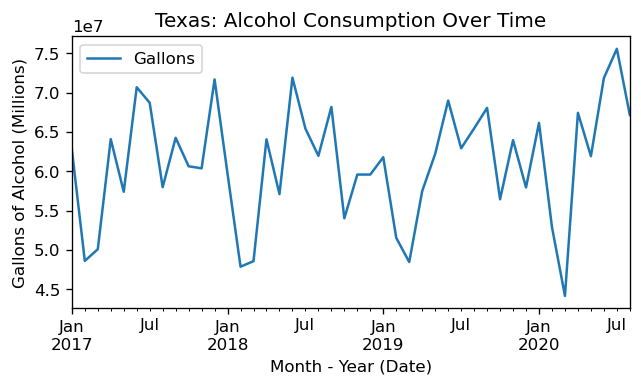

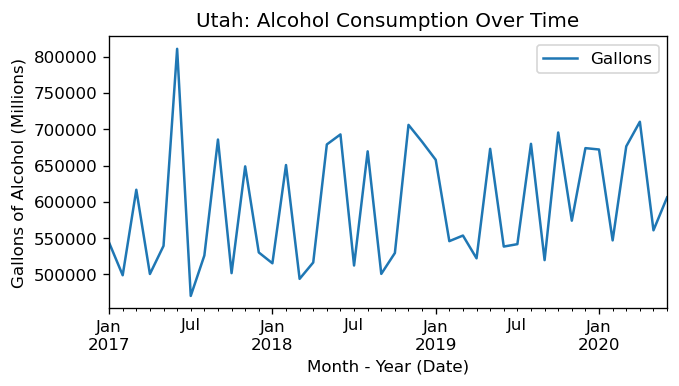

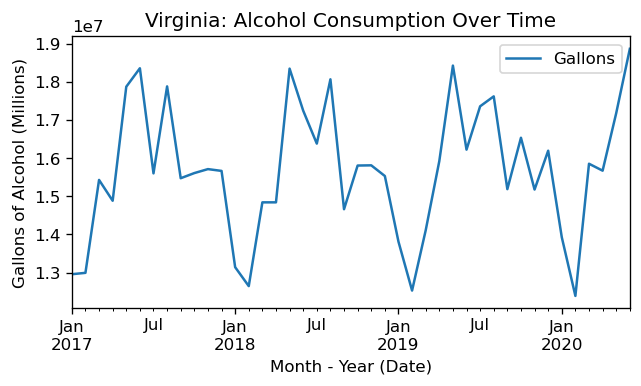

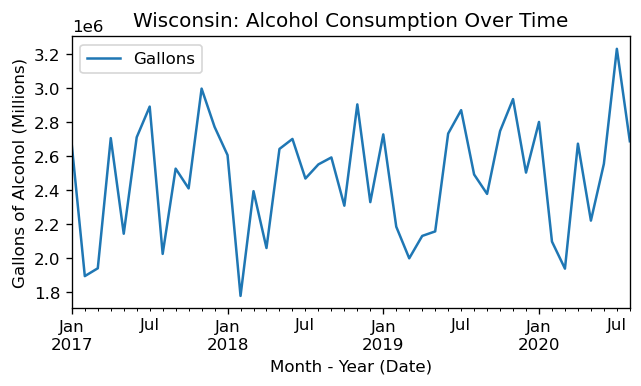

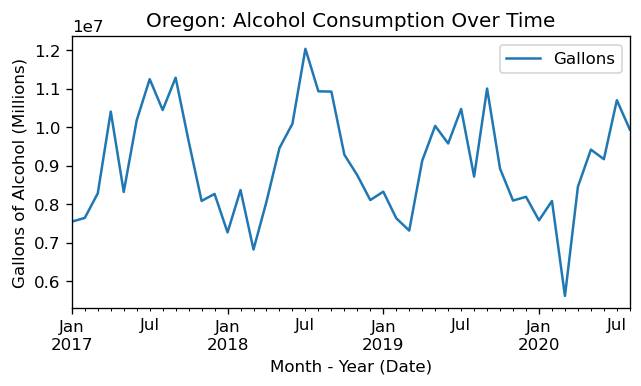

In [161]:
states = alcohol_sales_data["State"].unique()

state = "Alaska"

for state in states:

    #Filter for State ONLY
    state_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == state]

    # Groupby Data Frame by Date
    state_by_year = state_df.groupby(['Month - Year (Date)'])

    # Find sum of gallons
    state_total_gallons = state_by_year["Gallons"].sum()

    # Find sum of ethanol
    state_total_ethanol = state_by_year["Ethanol"].sum()

    # Find average of population
    state_avg_pop = state_by_year["Population"].mean()

    # Find average pc
    state_avg_pc = state_by_year["PerCapita"].mean()

    cleaned_state_df = pd.DataFrame({
        "Gallons": state_total_gallons,
        "Ethanol": state_total_ethanol,
        "Population": state_avg_pop,
        "PerCapita": state_avg_pc

    })
    #Plot State Alcohol Gallons Over Time
    cleaned_state_df.plot.line( y='Gallons', title=f"{state}: Alcohol Consumption Over Time", figsize=(6,3))
    plt.ylabel('Gallons of Alcohol (Millions)')

    #Save Figure to PNG
    plt.savefig(f"images/{state}_alcohol_consumption.png")
    plt.show()

#     cleaned_state_df.head()

# Seasonal Comparison of Alcohol Consumption Over Years

In [131]:
#Set figure size & dpi
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import Data
df = pd.read_csv('Data/alcsales_August2020_codedfullfile_2.csv', parse_dates=['Month - Year (Date)'], index_col='Month - Year (Date)')
df.reset_index(inplace=True)

updated_df = df.rename(columns={"Month - Year (Date)": "date"})
# Prepare data
updated_df['Year'] = [d.year for d in updated_df.date]
updated_df['Month.1'] = [d.strftime('%b') for d in updated_df.date]
years = updated_df['Year'].unique()
month_names = updated_df["Month.1"].unique()

# Limit the dataset to months where we have observations for 2020 (ie Jan - Aug)
updated_df = updated_df.loc[updated_df.Month < 8].copy()

updated_df.head()

,date,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric)
0,2017-01-01,2017,1,2,1,103645,42598,593378,0.0718,Alaska,Jan,January 2017,1 2017
1,2017-01-01,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,Jan,January 2017,1 2017
2,2017-01-01,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,Jan,January 2017,1 2017
3,2017-01-01,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,Jan,January 2017,1 2017
4,2017-01-01,2017,1,10,1,180388,74139,799550,0.0927,Delaware,Jan,January 2017,1 2017


In [133]:
#Run national groupby & agg
national_groupby = updated_df.groupby(['Year', 'Month']).aggregate({"Gallons": 'sum', "Month.1":'first','PerCapita':'sum'}).reset_index()
national_groupby.head()

,Year,Month,Gallons,Month.1,PerCapita
0,2017,1,213428134,Jan,2.9843
1,2017,2,202554024,Feb,2.9446
2,2017,3,234341479,Mar,3.4505
3,2017,4,242022452,Apr,3.4304
4,2017,5,253716538,May,3.7315


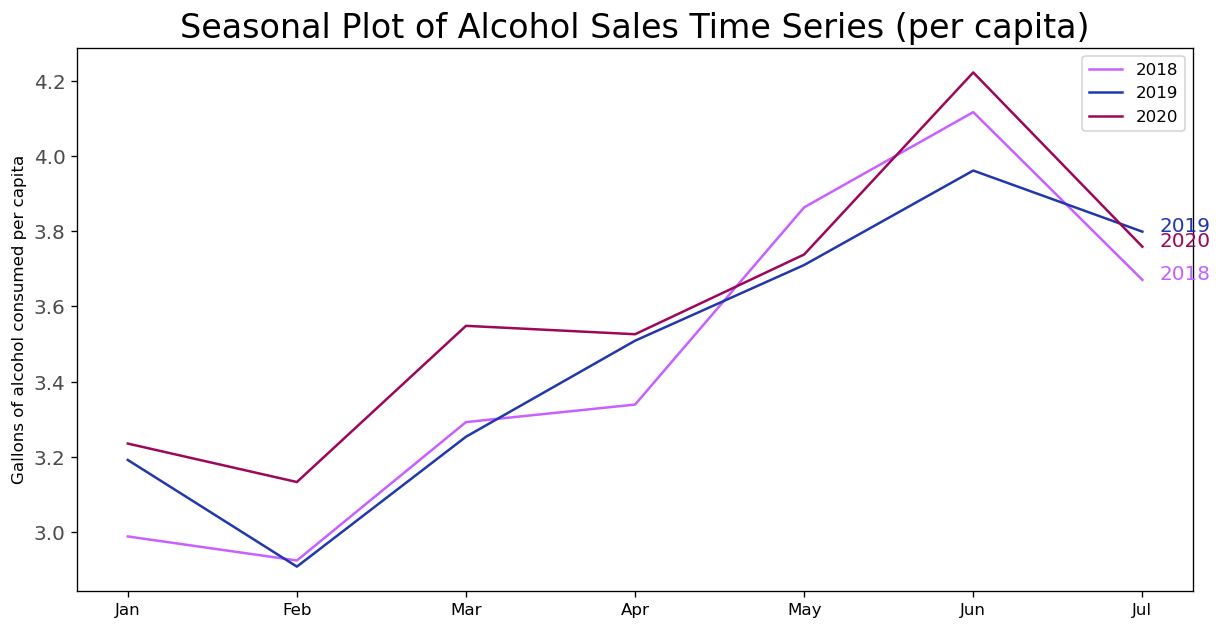

In [134]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
fig, ax = plt.subplots(figsize=(12,6))
for i, y in enumerate(years):
    if i > 0:        
        subset = national_groupby.loc[national_groupby.Year ==y].copy()
        plt.plot('Month.1', 'PerCapita', 
                 data=subset, 
                 color=mycolors[i], 
                 label=y)
        plt.text(subset.shape[0]-.9, subset["PerCapita"][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
# ax.set_xticklabels(month_names)
plt.yticks(fontsize=12, alpha=.7)
plt.ylabel("Gallons of alcohol consumed per capita")
plt.title("Seasonal Plot of Alcohol Sales Time Series (per capita)", fontsize=20)
plt.legend()
plt.show()

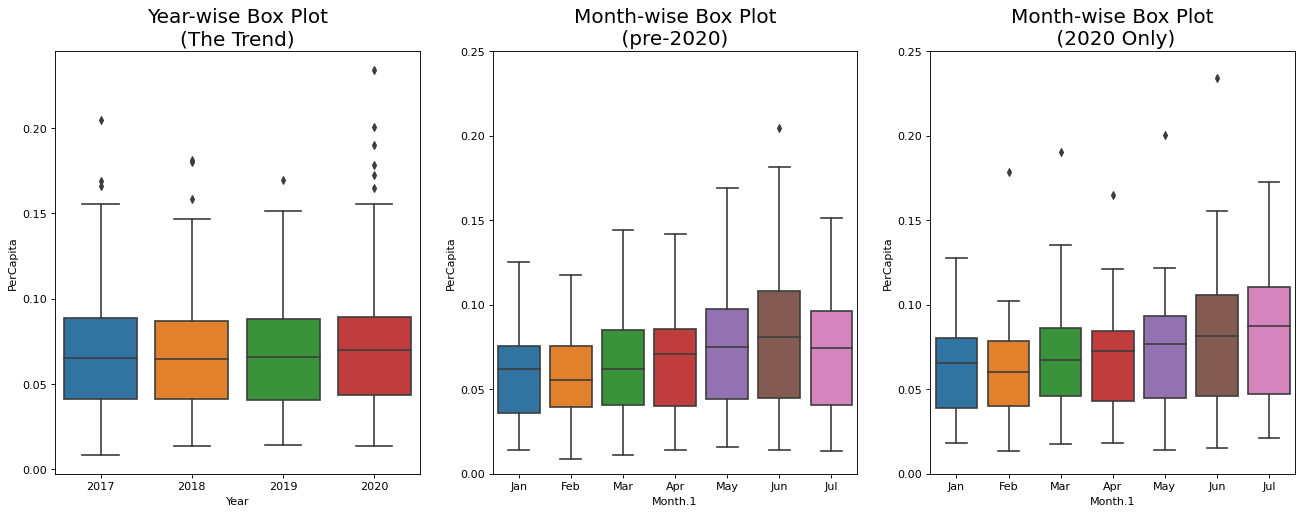

In [135]:
# Draw Plot
fig, axes = plt.subplots(1, 3, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='PerCapita', data=updated_df, ax=axes[0])
sns.boxplot(x='Month.1', y='PerCapita', data=updated_df.loc[updated_df.Year < 2020], ax = axes[1])
sns.boxplot(x='Month.1', y='PerCapita', data=updated_df.loc[updated_df.Year == 2020], ax = axes[2])


# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n (pre-2020) ', fontsize=18)
axes[2].set_title('Month-wise Box Plot\n (2020 Only)', fontsize=18)

axes[1].set_ylim(0, 0.25)
axes[2].set_ylim(0, 0.25)

plt.show()

# Linear Regression: Alcohol Consumption Per Capita Against COVID Stringency

In [140]:
# File to load for severity index - file already cleaned for states with available alcohol data
file_path_2 = "cleaned_covid_stringency_index.csv"

# Read Purchasing File and store into Pandas data frame
covid_stringency_index = pd.read_csv(file_path_2)

covid_stringency_index.head()

,RegionName,Average Stringency Index,Average Stringency Legacy Index,Average Government Response,Average Containment Health Risk,Average Economic Support Index
0,Alaska,40.972890,49.336651,44.245046,43.530826,48.165138
1,Arkansas,36.332156,42.355596,35.971743,38.969220,19.266055
2,Colorado,41.367936,45.093624,39.550550,39.496468,39.850917
3,Connecticut,42.490046,48.216651,43.641789,44.528440,38.761468
4,Delaware,48.011422,52.954587,47.494633,48.290780,43.119266


In [141]:
#file to load for cleaned state by state alcohol consumption
file_path_3 = "grouped_state_df.csv"

# Read Purchasing File and store into Pandas data frame
grouped_state_df_file = pd.read_csv(file_path_3)

grouped_state_df_file.head()

,State,Count,Gallons,Ethanol,Total Population,Avg PerCapita
0,Alaska,132,6165264,6165264,590760,0.079049
1,Arkansas,132,16429378,16429378,2465297,0.050443
2,Colorado,132,49557495,49557495,4715895,0.079425
3,Connecticut,129,26302609,26302609,3019150,0.067557
4,Delaware,129,10447503,10447503,808146,0.100049


In [142]:
#Merge files
merged_df = pd.concat([covid_stringency_index, grouped_state_df_file], axis=1, join='inner')
df.set_index('State', inplace=True)

merged_df.head()

,RegionName,Average Stringency Index,Average Stringency Legacy Index,Average Government Response,Average Containment Health Risk,Average Economic Support Index,State,Count,Gallons,Ethanol,Total Population,Avg PerCapita
0,Alaska,40.972890,49.336651,44.245046,43.530826,48.165138,Alaska,132,6165264,6165264,590760,0.079049
1,Arkansas,36.332156,42.355596,35.971743,38.969220,19.266055,Arkansas,132,16429378,16429378,2465297,0.050443
2,Colorado,41.367936,45.093624,39.550550,39.496468,39.850917,Colorado,132,49557495,49557495,4715895,0.079425
3,Connecticut,42.490046,48.216651,43.641789,44.528440,38.761468,Connecticut,129,26302609,26302609,3019150,0.067557
4,Delaware,48.011422,52.954587,47.494633,48.290780,43.119266,Delaware,129,10447503,10447503,808146,0.100049


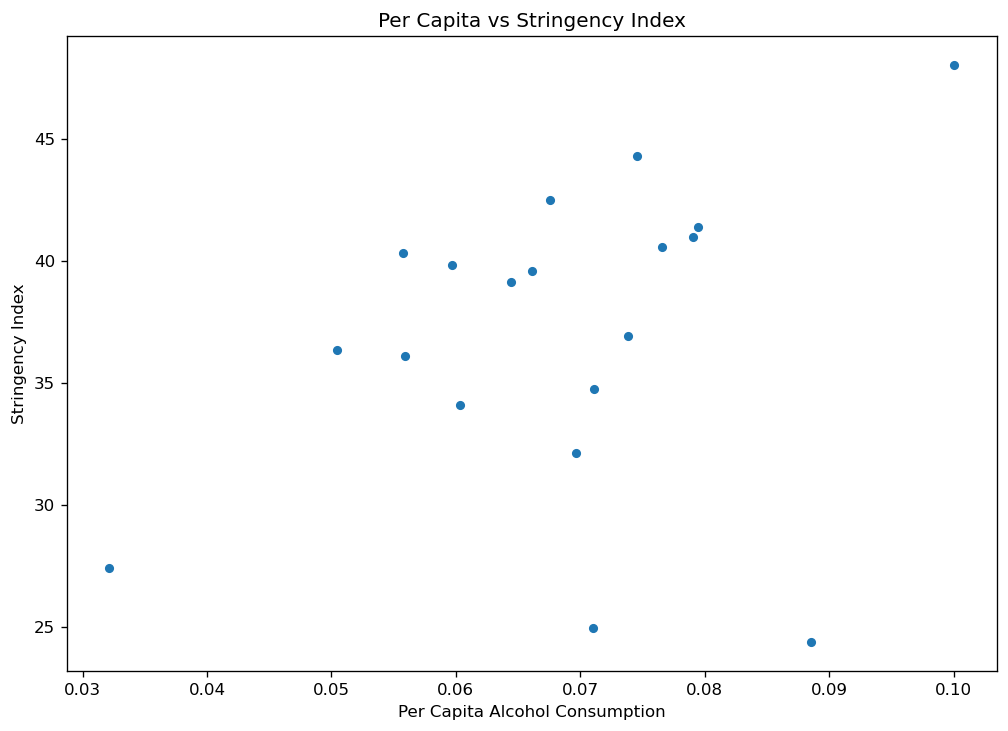

In [223]:
# Generate a scatter plot of perCapita alcohol consumption vs. average stringency index per State

#Assign variables for perCapita alcohol consumption and stringency 
per_capita_2 = merged_df['Avg PerCapita']
stringency_index_2 = merged_df['Average Stringency Index']

#create datagram for above variables
per_capita_stringency_index = pd.DataFrame({
    "Per Capita Alcohol Consumption": per_capita_2,
    "Stringency Index": stringency_index_2
})

#Plot
per_capita_stringency_index.plot.scatter(x="Per Capita Alcohol Consumption", y="Stringency Index", title="Per Capita vs Stringency Index")

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for per capita and strngency index for all states
correlation = st.pearsonr(per_capita_2,stringency_index_2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.31


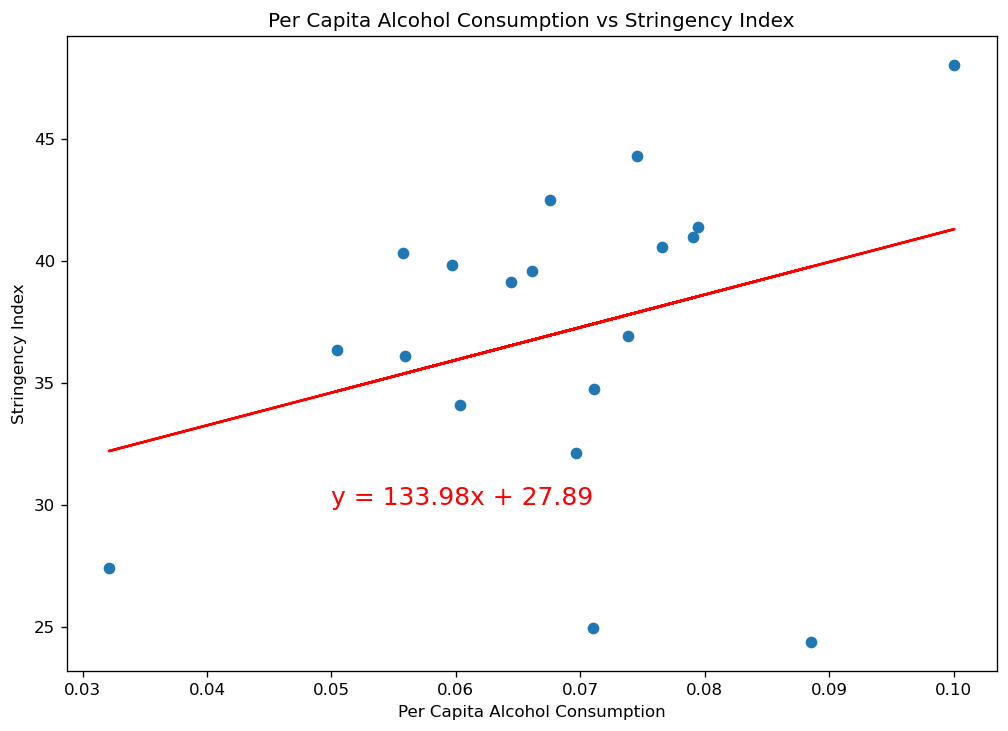

In [224]:
#Map out linear regression analysis
x_values = per_capita_2
y_values = stringency_index_2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.05,30),fontsize=15,color="red")
plt.xlabel('Per Capita Alcohol Consumption')
plt.ylabel('Stringency Index')
plt.title("Per Capita Alcohol Consumption vs Stringency Index")
plt.show()

# Linear Regression: Alcohol Consumption Per Capita Against New Covid Cases

In [186]:
#Filter alcohol consumption data for only 2020 results
alcohol_sales_data_2020_only = alcohol_sales_data.loc[alcohol_sales_data["Year"] == 2020]

#Show head
alcohol_sales_data_2020_only.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
1872,2020,1,2,1,121885,50095,589481,0.0850,Alaska,January,January 2020,1 2020,2020-01-01
1873,2020,1,5,1,325925,133955,2476087,0.0541,Arkansas,January,January 2020,1 2020,2020-01-01
1874,2020,1,8,1,896700,368544,4789291,0.0770,Colorado,January,January 2020,1 2020,2020-01-01
1875,2020,1,9,1,656658,269886,3019188,0.0894,Connecticut,January,January 2020,1 2020,2020-01-01
1876,2020,1,10,1,175845,72272,816603,0.0885,Delaware,January,January 2020,1 2020,2020-01-01


In [187]:
#Read in covid data

# File path to load
covid_data_path_1 = "Data/Cum_cases_per_100000.csv"

# Read file and store into Pandas data frame
covid_cases_cum_100000 = pd.read_csv(covid_data_path_1)


#Show head
covid_cases_cum_100000.head()


,Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
3,2020-04-01,37.8,58.7,152.3,436.4,235.9,101.5,211.1,62.8,55.5,448.5,473.2,78.5,64.8,92.2,54.6,87.0,92.2,68.0
4,2020-05-01,53.9,160.6,370.0,1017.2,769.7,208.6,717.2,262.2,166.4,736.1,1208.7,173.6,244.6,255.9,159.2,225.4,358.4,212.7


In [191]:
#"Transpose" data to get ready to merge with alcohol consumption df
formatted_covid_cases = pd.melt(covid_cases_cum_100000, id_vars=['Month'])


#Show
formatted_covid_cases.head()

,Month,variable,value
0,2020-01-01,Alaska,0.0
1,2020-02-01,Alaska,0.0
2,2020-03-01,Alaska,3.6
3,2020-04-01,Alaska,37.8
4,2020-05-01,Alaska,53.9


In [205]:
#Rename columns in transposed table and format datetime
final_covid_cases_df = formatted_covid_cases.rename(columns = {"variable": "State" , "value": "New Cases (100000)"})
final_covid_cases_df['Month'] = pd.to_datetime(final_covid_cases_df['Month'])

#Show
final_covid_cases_df.head()

,Month,State,New Cases (100000)
0,2020-01-01,Alaska,0.0
1,2020-02-01,Alaska,0.0
2,2020-03-01,Alaska,3.6
3,2020-04-01,Alaska,37.8
4,2020-05-01,Alaska,53.9


In [218]:
#Merge files
merged_df_2 = pd.merge(final_covid_cases_df, alcohol_sales_data_2020_only, how='left', left_on=['Month', "State"], right_on = ['Month - Year (Date)','State'])

#Show
cleaned_merged_df_2 = merged_df_2.dropna()

cleaned_merged_df_2.head()

,Month_x,State,New Cases (100000),Year,Month_y,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2020-01-01,Alaska,0.0,2020.0,1.0,2.0,1.0,121885.0,50095.0,589481.0,0.0850,January,January 2020,1 2020,2020-01-01
1,2020-01-01,Alaska,0.0,2020.0,1.0,2.0,2.0,143291.0,18485.0,589481.0,0.0314,January,January 2020,1 2020,2020-01-01
2,2020-01-01,Alaska,0.0,2020.0,1.0,2.0,3.0,873146.0,39292.0,589481.0,0.0667,January,January 2020,1 2020,2020-01-01
3,2020-02-01,Alaska,0.0,2020.0,2.0,2.0,1.0,124792.0,51290.0,589481.0,0.0870,February,February 2020,2 2020,2020-02-01
4,2020-02-01,Alaska,0.0,2020.0,2.0,2.0,2.0,183387.0,23657.0,589481.0,0.0401,February,February 2020,2 2020,2020-02-01


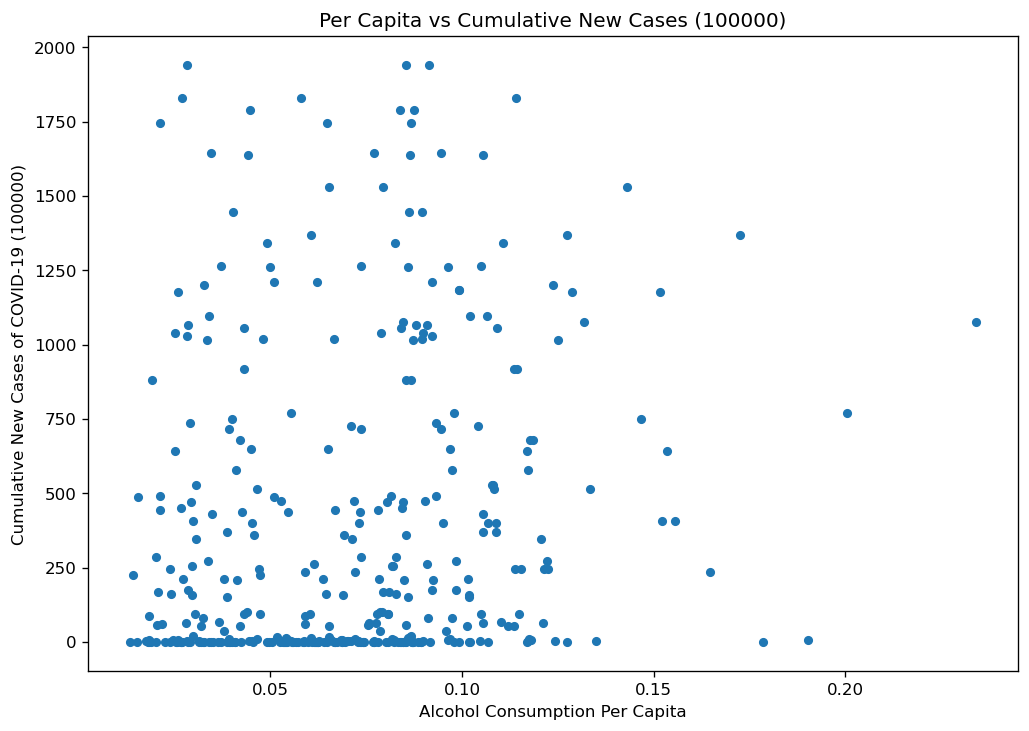

In [219]:
# Generate a scatter plot of perCapita alcohol consumption vs. cumulative new cases of COVID-19 per State

#Assign variables for perCapita alcohol consumption and stringency 
covid_cases_var = cleaned_merged_df_2['New Cases (100000)']
covid_cases_alc_cons_var = cleaned_merged_df_2['PerCapita']

#create datagram for above variables
covid_new_cases_alc_consumption_df = pd.DataFrame({
    "Cumulative New Cases of COVID-19 (100000)": covid_cases_var,
    "Alcohol Consumption Per Capita": covid_cases_alc_cons_var
})

#Plot
covid_new_cases_alc_consumption_df.plot.scatter(x="Alcohol Consumption Per Capita", y="Cumulative New Cases of COVID-19 (100000)", title="Per Capita vs Cumulative New Cases (100000)")

In [222]:
# Calculate the correlation coefficient and linear regression model 
# for per capita and strngency index for all states
correlation_2 = st.pearsonr(covid_cases_var, covid_cases_alc_cons_var)
print(f"The correlation between both factors is {round(correlation_2[0],2)}")

The correlation between both factors is 0.16


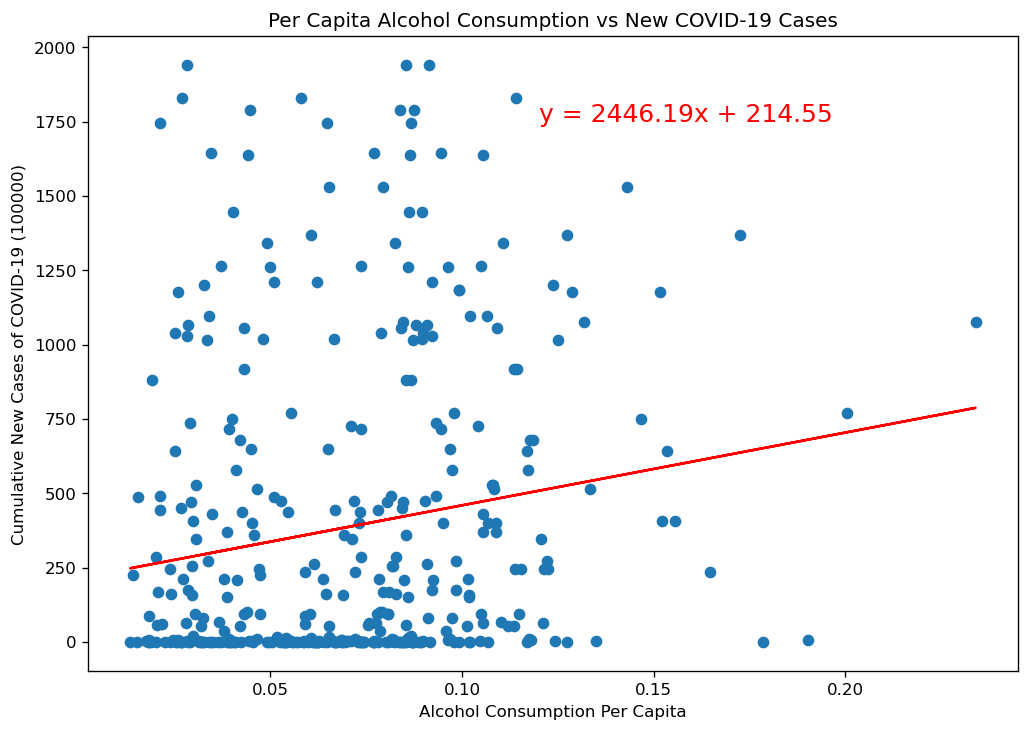

In [221]:
#Map out linear regression analysis
x_values = covid_cases_alc_cons_var
y_values = covid_cases_var
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.12,1750),fontsize=15,color="red")
plt.xlabel('Alcohol Consumption Per Capita')
plt.ylabel('Cumulative New Cases of COVID-19 (100000)')
plt.title("Per Capita Alcohol Consumption vs New COVID-19 Cases")
plt.show()